In [1]:

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipython-input-3159502391.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [ ]:
i = np.array([8,5,-4])
w = np.array([0.5,0.3,0.2])
o = np.sign(i.dot(w)) #non linear sgn function

4.7


# linear regression

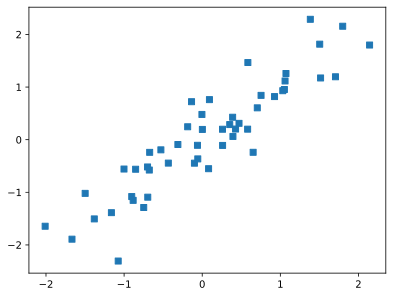

In [3]:
#create data
N = 50
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2
plt.plot(x,y,'s')
plt.show()

In [4]:
#build model
ANNreg = nn.Sequential(
    nn.Linear(1,1), #input layer
    #nn.ReLU(), #activation function
    nn.Linear(1,1) #output layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Linear(in_features=1, out_features=1, bias=True)
)

In [5]:
#learning rate
learningRate = 0.05

#loss function
lossfun = nn.MSELoss()

#optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr = learningRate )
#https://docs.pytorch.org/docs/stable/generated/torch.optim.SGD.html

In [6]:
#train the model
numepochs = 500
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
  #forward pass
  yHat = ANNreg(x)

  #compute loss
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  #backprop
  optimizer.zero_grad() #initialize all gradients to 0
  loss.backward() #backprop based on losses
  optimizer.step() #housekeeping functions of SGD

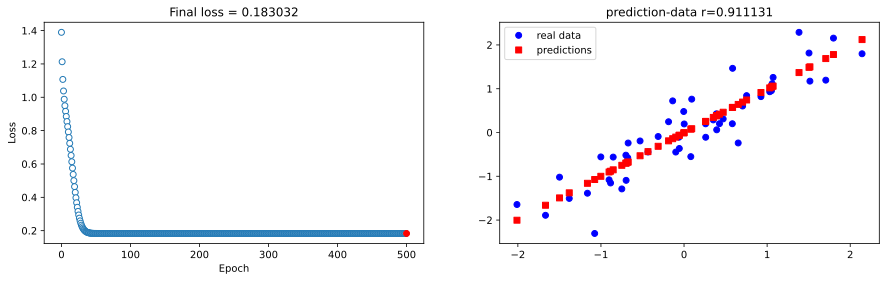

In [21]:
#show the losses

#manually compute losses
#final forward pass
predictions = ANNreg(x)

#final loss (MSE)
testloss = (predictions - y).pow(2).mean()

fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].plot(losses.detach(),'o',markerfacecolor = 'w',linewidth = 0.1)
ax[0].plot(numepochs,testloss.detach(),'ro') #detach isolates loss value from gradient in output #testloss.item() returns scalar instead of tensor
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Final loss = %g' %testloss.item())

ax[1].plot(x,y,'bo',label = 'real data')
ax[1].plot(x,predictions.detach(),"rs", label = "predictions")
ax[1].set_title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:2f}')
ax[1].legend()

plt.show()


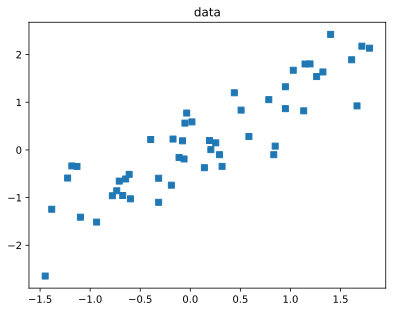

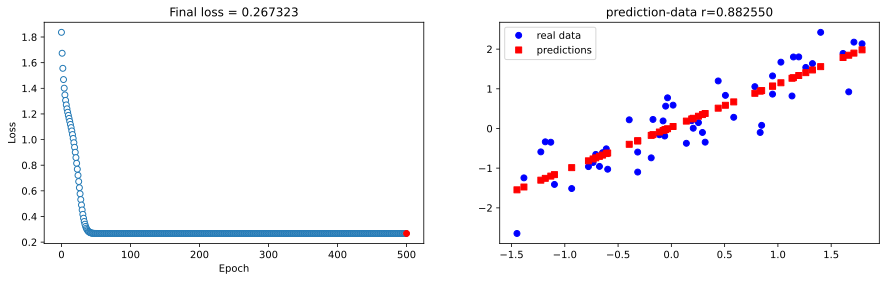

In [42]:
def build_train_model(x,y,learningRate = 0.05, numepochs = 500):

  #build the model
  ANNreg = nn.Sequential(
    nn.Linear(1,1), #input layer
    #nn.ReLU(), #activation function
    nn.Linear(1,1) #output layer
    )

  lossfun = nn.MSELoss()
  optimizer = torch.optim.SGD(ANNreg.parameters(),lr = learningRate )
  losses = torch.zeros(numepochs)

  #train the model
  for epochi in range(numepochs):
    #forward pass
    yHat = ANNreg(x)

    #compute loss
    loss = lossfun(yHat,y)
    losses[epochi] = loss

    #backprop
    optimizer.zero_grad() #initialize all gradients to 0
    loss.backward() #backprop based on losses
    optimizer.step() #housekeeping functions of SGD

  #final predictions and losses
  predictions = ANNreg(x)
  testloss = (predictions - y).pow(2).mean() #MSE

  return predictions,testloss,losses

def visualize_results (x,y,losses,testloss,predictions,numepochs=500):
  fig,ax = plt.subplots(1,2,figsize=(15,4))
  ax[0].plot(losses.detach(),'o',markerfacecolor = 'w',linewidth = 0.1)
  ax[0].plot(numepochs,testloss.detach(),'ro') #detach isolates loss value from gradient in output #testloss.item() returns scalar instead of tensor
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Final loss = %g' %testloss.item())

  ax[1].plot(x,y,'bo',label = 'real data')
  ax[1].plot(x,predictions.detach(),"rs", label = "predictions")
  ax[1].set_title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:2f}')
  ax[1].legend()

  plt.show()

def create_data(sample_size=50,slope = 1,visualize = 'no'):
  N = sample_size
  x = torch.randn(N,1)
  y = slope*x + torch.randn(N,1)/2

  if visualize =='yes':
    plt.plot(x,y,'s')
    plt.title("data")
    plt.show()
  return x,y


x,y = create_data(sample_size=50,slope = 1,visualize = 'yes')
predictions2,testloss2,losses2 = build_train_model(x,y)
visualize_results(x,y,losses2,testloss2,predictions2)

/tmp/ipython-input-3827579706.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  results[i,:]= mi,testloss.detach(),corr_ceff


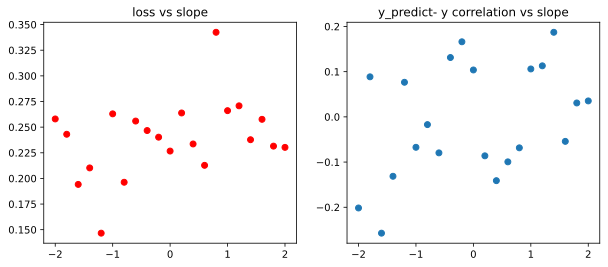

In [70]:
m= np.linspace(-2,2,21)
results = np.zeros((len(m),3))
for i,mi in enumerate(m):
  x,y = create_data(sample_size=50,slope = mi)
  prediction,testloss,losses = build_train_model(x,y)
  corr_ceff = np.corrcoef(y.T,predictions.detach().T)[0,1]
  results[i,:]= mi,testloss.detach(),corr_ceff

fig,ax = plt.subplots(1,2,figsize = (10,4))
ax[0].plot(results[:,0],results[:,1],'ro',label = "loss")
ax[0].set_title("loss vs slope")
ax[1].plot(results[:,0],results[:,2],'o',label = "correlation")
ax[1].set_title("y_predict- y correlation vs slope")
plt.show()

Separating hyperplane
- is a boundary that binarises and categorises data.
- It is used as a decision boundary

Feature space
- is a graphical representation where,
- each axis is a dimension of the data,
- and each point (scatter point) represents input data values

Backpropagation
- error signal needs to propagate backward through each node
- back propagation is just gradient descent
- chain rule of derivatives is used
- x-axis is now the weights axis
- its essentially gradient descent in multi dimensions